# Northern Ireland (NI) Monthly Births Analysis

There appears to be a persistent issue with birth rates in Northern Ireland in 2022.

The purpose of this notebook is to investigate this phenomenon to try and determine root cause.

# Usage
Navigate to any section starting with *Configure:* and set the variables as needed for your notebook execution.

For example, the month for which the current year's data ends should be configured to support year-on-year comparison with complete data.

# Setup
We install our baseline Python dependencies as part of the Container build process.

We import our utility functions from our local library.

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
from lib.utility_functions import local_ca_certificate_file_path, debug_this, Month, download_file
import pandas as pd

In [45]:
from lib.utility_functions import local_ca_certificate_file_path, \
mutate_safely, debug_this, Month, download_file, \
remove_timestamp, rename_columns, convert_dtypes_obj_to_strings, \
inner_join_with, print_full

debug_enabled = True
preview_only_enabled = False

def debug(item):
    debug_this(debug_enabled, item, preview_only_enabled)

## Configure: Subset of Months
Let's setup an ENUM to allow us to reference specific months.
This will be useful for the current years' dataset for which don't have all monthly data.

In [3]:
analysis_end_month = Month.AUGUST
analysis_end_month_for_births = analysis_end_month

## Configure: Debugging
Below is a global variable (bad!) that you can set to turn out debug statements. 
This will print intermediate dataframe and series data structures to aid troubleshooting.
It is disabled by default.

In [4]:
debug_enabled = True

# Prepare Monthly Births Data



## Acquire
The dataset from NISRA is published here: https://www.nisra.gov.uk/publications/monthly-births.

In [5]:
raw_nisra_monthly_births_source_url='https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/MonthlyBirths.xlsx'
raw_nisra_monthly_births_dest_filepath='data/inbound/raw/nisra/births/monthly/monthly_births.xlsx'

download_file(raw_nisra_monthly_births_source_url, raw_nisra_monthly_births_dest_filepath)

downloaded from: https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/MonthlyBirths.xlsx


In [9]:
df_monthly_births = pd.read_excel(raw_nisra_monthly_births_dest_filepath,  
                                  sheet_name='Births_Month of Birth', 
                                  skiprows=3, 
                                  nrows=12,
                                  usecols='A:S')
df_monthly_births

,Month of \nBirth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692.0
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495.0
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636.0
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485.0
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600.0
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674.0
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729.0
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768.0
8,September,2067,2148,2184,2171,2198,2218,2244,2154,2190,2158,2136,2024,2034,1988,1929,1970,1799,NaN
9,October,2048,2160,2283,2075,2201,2066,2198,2019,2167,2133,2030,1997,2007,1929,1928,1869,1788,NaN


## Tidy Up

In [10]:
month_of_birth_col_name = 'Month_of_Birth'

df_monthly_births_nans_removed = df_monthly_births\
    .rename(columns={"Month of \nBirth":month_of_birth_col_name})\
    .fillna(0)\
    .astype({'2023': int})

df_monthly_births_nans_removed

,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768
8,September,2067,2148,2184,2171,2198,2218,2244,2154,2190,2158,2136,2024,2034,1988,1929,1970,1799,0
9,October,2048,2160,2283,2075,2201,2066,2198,2019,2167,2133,2030,1997,2007,1929,1928,1869,1788,0


Let's save this dataframe for out of band analyses.

In [11]:
df_monthly_births_nans_removed.to_pickle(f'data/outbound/births/monthly/AllBirthsUpToMonth{analysis_end_month}2023.pkl')

# Analyse Monthly Births Data

## Range of Births 2006-2022 (YTD)

### Minimum Monthly Births 2006-2022 (YTD)

In [12]:
range_2006_to_2023 = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022', '2023']

In [13]:
df_monthly_births_nans_removed[0:analysis_end_month_for_births].style.highlight_min(range_2006_to_2023,color='red', axis=None)

,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768


### Maximum Monthly Births 2006-2022 (YTD)

In [14]:
df_monthly_births_nans_removed[0:analysis_end_month_for_births].style.highlight_max(range_2006_to_2023, color='green', axis=None)

,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768


## Heatmap Gradient Monthly Births 2006-2022 (YTD)

In [15]:
column_names_month_and_range_of_years = range_2006_to_2023.copy()
column_names_month_and_range_of_years.insert(0, month_of_birth_col_name)

### All Months (YTD)

In [16]:
df_monthly_births_only_12_month = df_monthly_births_nans_removed[column_names_month_and_range_of_years]
df_monthly_births_only_12_month[0:analysis_end_month_for_births].style.background_gradient(axis=None)

,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768


### By Month (YTD)

In [17]:
df_monthly_births_only_12_month[0:analysis_end_month_for_births].style.background_gradient(axis=1)

,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768


### By Year (YTD)

In [18]:
df_monthly_births_only_12_month[0:analysis_end_month_for_births].style.background_gradient(axis=0)

,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,1993,1910,1970,1873,1887,1926,1840,1687,1692
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,1712,1849,1741,1695,1680,1666,1649,1606,1495
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,1999,1985,1927,1800,1857,1738,1776,1759,1636
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,1928,1927,1830,1800,1849,1652,1712,1652,1485
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,2027,2015,1989,1979,1881,1764,1743,1696,1600
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,1936,2025,1776,1936,1759,1737,1763,1648,1674
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,2173,2059,2021,1971,1945,1879,1991,1770,1729
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,2144,2094,2041,2020,2007,1830,1910,1808,1768


## Yearly Births Grouped by Month

In [22]:
import plotly.io as pio
pio.templates

#init_notebook_mode(connected = True)
pio.renderers.default = 'iframe' # or iframe?

In [23]:
# See - https://plotly.com/python/styling-plotly-express/
import plotly.express as px
from plotly.graph_objects import Layout
import plotly.graph_objects as go

annotation_template = go.layout.Template()
annotation_template.layout.annotationdefaults = dict(font=dict(color="crimson"))
#layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

fig = px.bar(df_monthly_births_nans_removed, 
             x='Month_of_Birth', 
             y=range_2006_to_2023,
             title='NI Total Monthly Births 2006-2023',
             barmode='group',
#             facet_col='Month_of_Birth',
            height=600,template="xgridoff")

# Set x-axis title
fig.update_xaxes(title_text="Month of Birth")

# Set y-axis titles
fig.update_yaxes(title_text="Number of Births", secondary_y=False)

# Set Legend Name
fig.update_layout(legend_title_text='Year', 
                  bargap=0.1, 
                  bargroupgap=0.1)

# fig.update_layout(
#      template=annotation_template,
#      annotations=[
#          dict(text="February 2023 with the lowest births.", x=0.16, y=2100, xref="paper",yref="y", ax=-0.26, ay=-95)
#      ]
#  )

fig.show()


## Compute Monthly Means & SDs

In [24]:
normal_five_year_range_1=['2015','2016','2017','2018','2019']
df_monthly_births_nans_removed['2015_to_2019_Mean'] = df_monthly_births_nans_removed[normal_five_year_range_1].mean(axis=1)

normal_five_year_range_2=['2016','2017','2018','2019','2020']
df_monthly_births_nans_removed['2016_to_2020_Mean'] = df_monthly_births_nans_removed[normal_five_year_range_2].mean(axis=1)

normal_five_year_range_3=['2017','2018','2019','2020','2021']
df_monthly_births_nans_removed['2017_to_2021_Mean'] = df_monthly_births_nans_removed[normal_five_year_range_3].mean(axis=1)

df_monthly_births_nans_removed

#TODO - replace the above with below
# def calculate_mean_for_range(df, year_range):
#     mean_column_name = f"{year_range[0]}_to_{year_range[-1]}_Mean"
#     df[mean_column_name] = df[year_range].mean(axis=1)

# normal_five_year_ranges = [
#     ['2015', '2016', '2017', '2018', '2019'],
#     ['2016', '2017', '2018', '2019', '2020'],
#     ['2017', '2018', '2019', '2020', '2021']
# ]

# for year_range in normal_five_year_ranges:
#     calculate_mean_for_range(df_monthly_births_nans_removed, year_range)


,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2017,2018,2019,2020,2021,2022,2023,2015_to_2019_Mean,2016_to_2020_Mean,2017_to_2021_Mean
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,...,1970,1873,1887,1926,1840,1687,1692,1926.6,1913.2,1899.2
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,...,1741,1695,1680,1666,1649,1606,1495,1735.4,1726.2,1686.2
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,...,1927,1800,1857,1738,1776,1759,1636,1913.6,1861.4,1819.6
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,...,1830,1800,1849,1652,1712,1652,1485,1866.8,1811.6,1768.6
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,...,1989,1979,1881,1764,1743,1696,1600,1978.2,1925.6,1871.2
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,...,1776,1936,1759,1737,1763,1648,1674,1886.4,1846.6,1794.2
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,...,2021,1971,1945,1879,1991,1770,1729,2033.8,1975.0,1961.4
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,...,2041,2020,2007,1830,1910,1808,1768,2061.2,1998.4,1961.6
8,September,2067,2148,2184,2171,2198,2218,2244,2154,2190,...,2024,2034,1988,1929,1970,1799,0,2068.0,2022.2,1989.0
9,October,2048,2160,2283,2075,2201,2066,2198,2019,2167,...,1997,2007,1929,1928,1869,1788,0,2019.2,1978.2,1946.0


In [25]:
period_2015_to_2019=['2015','2016','2017','2018','2019']
df_monthly_births_nans_removed['2015_to_2019_Mean'] = df_monthly_births_nans_removed[period_2015_to_2019].mean(axis=1)

period_2016_to_2020=['2016','2017','2018','2019', '2020']
df_monthly_births_nans_removed['2016_to_2020_Mean'] = df_monthly_births_nans_removed[period_2016_to_2020].mean(axis=1)

period_2017_to_2021=['2017','2018','2019','2020','2021']
df_monthly_births_nans_removed['2017_to_2021_Mean'] = df_monthly_births_nans_removed[period_2017_to_2021].mean(axis=1)

df_monthly_births_nans_removedanalysis_end_month_for_births


,Month_of_Birth,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2017,2018,2019,2020,2021,2022,2023,2015_to_2019_Mean,2016_to_2020_Mean,2017_to_2021_Mean
0,January,1838,2007,2198,2056,2145,2118,2124,2053,2079,...,1970,1873,1887,1926,1840,1687,1692,1926.6,1913.2,1899.2
1,February,1751,1800,1946,1877,1884,1957,1967,1858,1782,...,1741,1695,1680,1666,1649,1606,1495,1735.4,1726.2,1686.2
2,March,1897,2011,2080,2158,2147,2110,2144,1894,1996,...,1927,1800,1857,1738,1776,1759,1636,1913.6,1861.4,1819.6
3,April,1860,1951,2108,2122,2034,2009,2038,1939,2014,...,1830,1800,1849,1652,1712,1652,1485,1866.8,1811.6,1768.6
4,May,2002,2020,2065,2006,2060,2067,2141,2053,2018,...,1989,1979,1881,1764,1743,1696,1600,1978.2,1925.6,1871.2
5,June,1941,1951,2065,2083,2070,2017,2012,1884,1911,...,1776,1936,1759,1737,1763,1648,1674,1886.4,1846.6,1794.2
6,July,2069,2153,2193,2158,2255,2231,2100,2216,2109,...,2021,1971,1945,1879,1991,1770,1729,2033.8,1975.0,1961.4
7,August,2050,2228,2156,2037,2082,2165,2111,2086,2175,...,2041,2020,2007,1830,1910,1808,1768,2061.2,1998.4,1961.6
8,September,2067,2148,2184,2171,2198,2218,2244,2154,2190,...,2024,2034,1988,1929,1970,1799,0,2068.0,2022.2,1989.0
9,October,2048,2160,2283,2075,2201,2066,2198,2019,2167,...,1997,2007,1929,1928,1869,1788,0,2019.2,1978.2,1946.0


In [32]:
analysis_end_month_for_births

<Month.AUGUST: 8>

In [50]:
df_monthly_births_nans_removed['2020_v_2015_2019_Mean_pct'] = ( df_monthly_births_nans_removed['2020'] - 
                                                               df_monthly_births_nans_removed['2015_to_2019_Mean'])/df_monthly_births_nans_removed['2015_to_2019_Mean']*100

df_monthly_births_nans_removed['2021_v_2015_2019_Mean_pct'] = ( df_monthly_births_nans_removed['2021'] - 
                                                               df_monthly_births_nans_removed['2015_to_2019_Mean'])/df_monthly_births_nans_removed['2015_to_2019_Mean']*100

df_monthly_births_nans_removed['2022_v_2015_2019_Mean_pct'] = ( df_monthly_births_nans_removed['2022'] - 
                                                               df_monthly_births_nans_removed['2015_to_2019_Mean'])/df_monthly_births_nans_removed['2015_to_2019_Mean']*100

df_monthly_births_nans_removed['2023_v_2015_2019_Mean_pct'] = ( df_monthly_births_nans_removed['2023'].loc[0:analysis_end_month_for_births] - 
                                                               df_monthly_births_nans_removed['2015_to_2019_Mean'].loc[0:analysis_end_month_for_births])/df_monthly_births_nans_removed['2015_to_2019_Mean'].loc[0:analysis_end_month_for_births]*100

df_monthly_births_nans_removed['2020_v_2016_2020_Mean_pct'] = ( df_monthly_births_nans_removed['2020'] - 
                                                               df_monthly_births_nans_removed['2016_to_2020_Mean'])/df_monthly_births_nans_removed['2016_to_2020_Mean']*100

df_monthly_births_nans_removed['2021_v_2016_2020_Mean_pct'] = ( df_monthly_births_nans_removed['2021'] - 
                                                               df_monthly_births_nans_removed['2016_to_2020_Mean'])/df_monthly_births_nans_removed['2016_to_2020_Mean']*100

df_monthly_births_nans_removed['2022_v_2016_2020_Mean_pct'] = ( df_monthly_births_nans_removed['2022'] - 
                                                               df_monthly_births_nans_removed['2016_to_2020_Mean'])/df_monthly_births_nans_removed['2016_to_2020_Mean']*100

df_monthly_births_nans_removed['2023_v_2016_2020_Mean_pct'] = ( df_monthly_births_nans_removed['2023'].loc[0:analysis_end_month_for_births] - 
                                                               df_monthly_births_nans_removed['2016_to_2020_Mean'].loc[0:analysis_end_month_for_births])/df_monthly_births_nans_removed['2016_to_2020_Mean'].loc[0:analysis_end_month_for_births]*100

# x = all_weekly_deaths_df_copy['Registration_Week'].loc[0:(analysis_end_week - 1)] if year == "2023" else all_weekly_deaths_df_copy['Registration_Week']

#TODO - replace the above code with the below code
# years = [2020, 2021, 2022, 2023]
# mean_columns = ['2015_to_2019_Mean', '2016_to_2020_Mean']  # Adjust as needed
# analysis_end_month_for_births = 4  # Adjust as needed

# for year in years:
#     for mean_column in mean_columns:
#         col_name = f"{year}_v_{mean_column}_pct"
#         numerator = df_monthly_births_nans_removed[str(year)]
#         denominator = df_monthly_births_nans_removed[mean_column]
        
#         if year == 2023:
#             numerator = numerator.loc[0:analysis_end_month_for_births]
#             denominator = denominator.loc[0:analysis_end_month_for_births]
        
#         df_monthly_births_nans_removed[col_name] = ((numerator - denominator) / denominator) * 100


In [51]:
df_monthly_births_nans_removed[["2015","2016","2017","2018","2019","2015_to_2019_Mean","2023","2023_v_2015_2019_Mean_pct","2022","2022_v_2015_2019_Mean_pct","2020","2020_v_2015_2019_Mean_pct"]]

,2015,2016,2017,2018,2019,2015_to_2019_Mean,2023,2023_v_2015_2019_Mean_pct,2022,2022_v_2015_2019_Mean_pct,2020,2020_v_2015_2019_Mean_pct
0,1993,1910,1970,1873,1887,1926.6,1692,-12.176892,1687,-12.436416,1926,-0.031143
1,1712,1849,1741,1695,1680,1735.4,1495,-13.852714,1606,-7.456494,1666,-3.999078
2,1999,1985,1927,1800,1857,1913.6,1636,-14.506689,1759,-8.079013,1738,-9.176421
3,1928,1927,1830,1800,1849,1866.8,1485,-20.452111,1652,-11.506321,1652,-11.506321
4,2027,2015,1989,1979,1881,1978.2,1600,-19.118390,1696,-14.265494,1764,-10.828025
5,1936,2025,1776,1936,1759,1886.4,1674,-11.259542,1648,-12.637829,1737,-7.919847
6,2173,2059,2021,1971,1945,2033.8,1729,-14.986724,1770,-12.970794,1879,-7.611368
7,2144,2094,2041,2020,2007,2061.2,1768,-14.224723,1808,-12.284106,1830,-11.216767
8,2158,2136,2024,2034,1988,2068.0,0,-100.000000,1799,-13.007737,1929,-6.721470
9,2133,2030,1997,2007,1929,2019.2,0,NaN,1788,-11.450079,1928,-4.516640


In [52]:
new_df = pd.melt(
    df_monthly_births_nans_removed,
    id_vars=["Month_of_Birth"],
    value_vars=["2020_v_2015_2019_Mean_pct", "2021_v_2015_2019_Mean_pct", 
                "2022_v_2015_2019_Mean_pct", "2023_v_2015_2019_Mean_pct", 
                "2020_v_2016_2020_Mean_pct", "2021_v_2016_2020_Mean_pct"],
    var_name="Period",
    value_name="% Change from Period Mean Births",
)
new_df['Year_of_Birth'] = new_df['Period'].str[:4]
new_df['Month_Year_of_Birth'] = new_df['Month_of_Birth'].str.cat(new_df['Year_of_Birth'], sep=' ')
# new_df['% Change from Period Mean Births']
print_full(new_df)#["Period" == "2023_v_2015_2019_Mean_pct"]

   Month_of_Birth                     Period   
0         January  2020_v_2015_2019_Mean_pct  \
1        February  2020_v_2015_2019_Mean_pct   
2           March  2020_v_2015_2019_Mean_pct   
3           April  2020_v_2015_2019_Mean_pct   
4             May  2020_v_2015_2019_Mean_pct   
5            June  2020_v_2015_2019_Mean_pct   
6            July  2020_v_2015_2019_Mean_pct   
7          August  2020_v_2015_2019_Mean_pct   
8       September  2020_v_2015_2019_Mean_pct   
9         October  2020_v_2015_2019_Mean_pct   
10       November  2020_v_2015_2019_Mean_pct   
11       December  2020_v_2015_2019_Mean_pct   
12        January  2021_v_2015_2019_Mean_pct   
13       February  2021_v_2015_2019_Mean_pct   
14          March  2021_v_2015_2019_Mean_pct   
15          April  2021_v_2015_2019_Mean_pct   
16            May  2021_v_2015_2019_Mean_pct   
17           June  2021_v_2015_2019_Mean_pct   
18           July  2021_v_2015_2019_Mean_pct   
19         August  2021_v_2015_2019_Mean

In [53]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

We want to plot only up to the current in month in 2023 for which we have data, so we calculate 3 years (2020, 2021 and 2022) of 12 months each plus the number of months for 2023.

In [54]:
month_range_to_plot = (12 * 3) + analysis_end_month_for_births.value
print(month_range_to_plot)

44


In [55]:
new_df.to_pickle(f"data/outbound/births/monthly/MeanBirthDifference2020to20203_{analysis_end_month_for_births}.pkl")

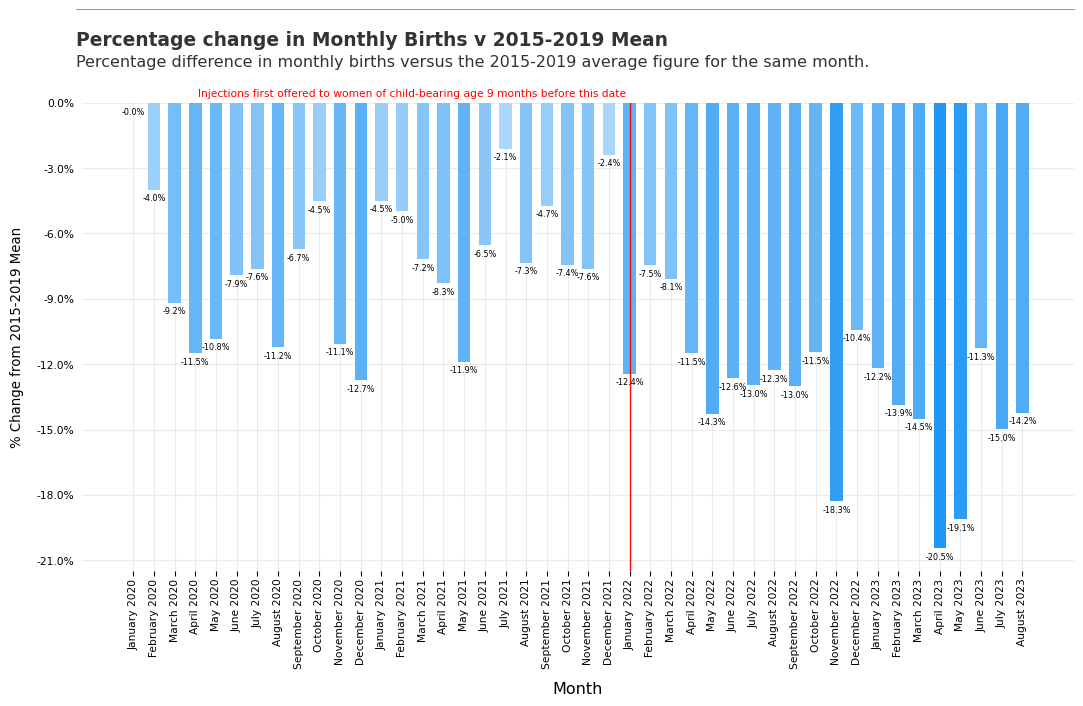

In [56]:
# Let's follow this - https://towardsdatascience.com/5-steps-to-build-beautiful-bar-charts-with-python-3691d434117a

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot bars
bar1 = ax.bar(new_df['Month_Year_of_Birth'][0:month_range_to_plot], new_df['% Change from Period Mean Births'][0:month_range_to_plot], width=0.6)
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('Month', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=8, labelrotation=90)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(new_df['Month_Year_of_Birth'][0:month_range_to_plot]) # Map integers numbers from the series to labels list

ax.set_ylabel('% Change from 2015-2019 Mean', fontsize=10, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.1f}%')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=8)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.1f}%' for e in new_df['% Change from Period Mean Births'][0:month_range_to_plot]], padding=3, color='black', fontsize=6) 

# Remove the spines
ax.spines[['top','left','bottom', 'right']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='grey', linewidth=.6) #'#E3120B'
# ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Percentage change in Monthly Births v 2015-2019 Mean", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.90, s="Percentage difference in monthly births versus the 2015-2019 average figure for the same month.", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=-0.0005, s="Source: www.www.w", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(new_df['% Change from Period Mean Births'][0:month_range_to_plot].min(), 
                            new_df['% Change from Period Mean Births'][0:month_range_to_plot].max()) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(new_df['Month_Year_of_Birth'][0:month_range_to_plot], 
              new_df['% Change from Period Mean Births'][0:month_range_to_plot], 
              color=cmap(norm(new_df['% Change from Period Mean Births'][0:month_range_to_plot])), 
              width=0.6, 
              zorder=2)

# # Find the average data point and split the series in 2
# average = new_df['% Change from Period Mean Births'][0:38].mean()
# average
# below_average = new_df[new_df['% Change from Period Mean Births']<average]
# above_average = new_df[new_df['% Change from Period Mean Births']>=average]

# # Colours - Choose the extreme colours of the colour map
# colors_high = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
# colors_low = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# # Colormap - Build the colour maps
# cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
# cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
# norm_low = mpl.colors.Normalize(below_average['% Change from Period Mean Births'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
# norm_high = mpl.colors.Normalize(average, above_average['% Change from Period Mean Births'].max())

# # Plot bars and average (horizontal) line
# bar1 = ax.bar(below_average['Month_Year_of_Birth'], below_average['% Change from Period Mean Births'], color=cmap_low(norm_low(below_average['% Change from Period Mean Births'])), width=0.6, label='Below Average', zorder=2)
# bar2 = ax.bar(above_average['Month_Year_of_Birth'], above_average['% Change from Period Mean Births'], color=cmap_high(norm_high(above_average['% Change from Period Mean Births'])), width=0.6, label='Above Average', zorder=2)
# plt.axhline(y=average, color = 'grey', linewidth=3)

# # Determine the y-limits of the plot
# ymin, ymax = ax.get_ylim()
# # Calculate a suitable y position for the text label
# y_pos = average/ymax + 0.03
# # Annotate the average line
# ax.text(0.88, y_pos, f'Average = {average:.1f}', ha='right', va='center', transform=ax.transAxes, size=8, zorder=3)

# # Add legend
# ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)

ax.text('January 2022', 0.4, f'Injections first offered to women of child-bearing age 9 months before this date ', ha='right', va='center', size=8, zorder=3, color='red')
plt.axvline(x='January 2022',color = 'red', linewidth=1, mouseover=True)
# # Annotate the average line


## December-January Drop Comparison

In [57]:
year_range = range_2006_to_2023.copy()
year_range.remove('2006')

def calculate_jan_dec_delta_in_range(year_range, monthly_totals) -> pd.Series:
    january = 0
    december = 11
    start_year_index = 1
    end_year_index = 17

    jan_dec_birth_date_deltas = []
    
    for year in range(1, 17, 1):
        next_year = year + 1   
        jan_dec_birth_date_deltas.append(monthly_totals.iloc[january, next_year] - monthly_totals.iloc[december, year])

    return pd.Series(jan_dec_birth_date_deltas, index=year_range)

delta_series = calculate_jan_dec_delta_in_range(year_range, df_monthly_births_nans_removed)
delta_series

ValueError: Length of values (16) does not match length of index (17)

So it appears that the drop in births from December 2021 to January 2022 is the largest drop between these two months in the previous 16 years at least.

## All Month-Month Drop Comparison

Can we deduce if the drop from December 2021 to January 2022 is the largest drop between ANY two consecutive months in the previous 16 years.

In [46]:
df_monthly_birth_years_of_interest.diff(periods=1, axis=0).style.highlight_min(range_2006_to_2023, color='red', axis=None)

NameError: name 'df_monthly_birth_years_of_interest' is not defined

It would appear that there have been much larger drops in consecutive months than December 2021 - January 2022.  One such example is September - October 2008.  A drop of 258 births.

My estimate is that the 2022 drop in January is high but not in the 95th percentile.  

We could prove this.

## Calculate Z-Scores for Monthly Births

In [47]:
# Get list of years
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Calculate z-score for each year
for year in years:
    zscore_col = f"{year}_zscore_for_2015_to_2019"
    df_monthly_births_nans_removed[zscore_col] = ((df_monthly_births_nans_removed[year] - df_monthly_births_nans_removed['2015_to_2019_Mean']) / df_monthly_births_nans_removed['2015_to_2019_SD'])

debug_this(debug_enabled, df_monthly_births_nans_removed)

KeyError: '2015_to_2019_SD'

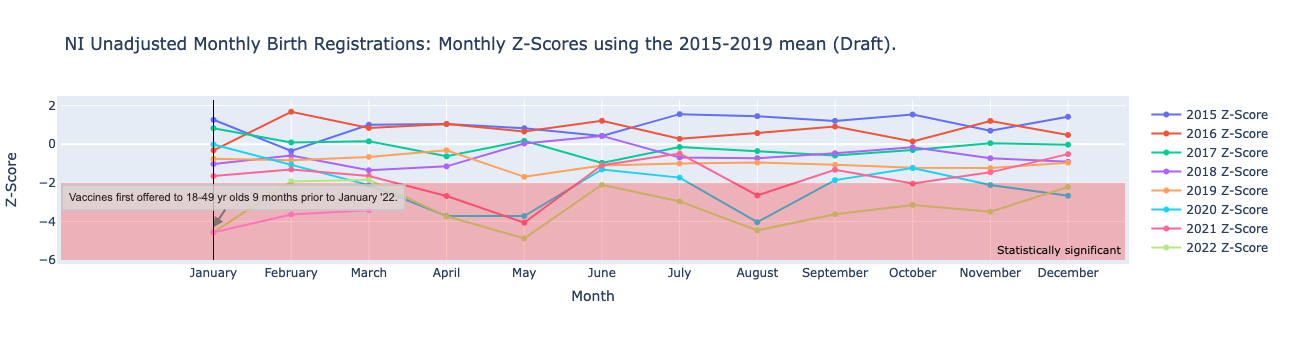

In [22]:
# import plotly.offline as pyo
import plotly.graph_objects as go
import datetime
from plotly.subplots import make_subplots

fig_births = make_subplots(specs=[[{"secondary_y": False}]])

# Get list of years to plot
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

incomplete_year = '2023'

# Add trace for each year but subset the data for the active year to only those months that have published figures.
for year in years:
    zscore_col = f"{year}_zscore_for_2015_to_2019"
    
    monthly_births_value_range = df_monthly_births_nans_removed[zscore_col]
    
    if incomplete_year == year:
        monthly_births_value_range = df_monthly_births_nans_removed[zscore_col].loc[0:(analysis_end_month_for_births -1)]
    
    fig_births.add_trace(go.Scatter(x=df_monthly_births_nans_removed['Month_of_Birth'], y=monthly_births_value_range, name=f"{year} Z-Score"),secondary_y=False,)

fig_births.add_hrect(y0=-2, y1=-6, 
              annotation_text="Statistically significant", annotation_position="bottom right",  
              annotation_font_size=11,
              annotation_font_color="Black",
              fillcolor="red", opacity=0.25, line_width=0)

fig_births.update_layout(
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

fig_births.add_vline(x='January', line_width=1, line_color='black')
fig_births.add_annotation(
        x='January',
        y=-4.3,
        xref="x",
        yref="y",
        text="Vaccines first offered to 18-49 yr olds 9 months prior to January '22.",
        showarrow=True,
        font=dict(
            family="Arial",
            size=11,
            color="#020202"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ddd9d8 ",
        opacity=0.8
        )

# Add figure title
fig_births.update_layout(
    title_text="NI Unadjusted Monthly Birth Registrations: Monthly Z-Scores using the 2015-2019 mean (Draft)."
)

# Set x-axis title
fig_births.update_xaxes(title_text="Month")

# Set y-axes titles
fig_births.update_yaxes(title_text="Z-Score", secondary_y=False)

fig_births.show()

It's looking like in the first five months of the last 17 years, 2022 has had the lowest birth rate in each month except for March 2020.

Can this be explained by a delay in processing birth registrations for 2022?

What is significant is the rate of change between December 2021 and January 2022.  If we walk back nine months from January 2022 we arrive at April 2021.